In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_excel('./default of credit card clients.xls')

In [4]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df.rename(columns = {'Unnamed: 0': 'ID'}, inplace=True)

In [6]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
print(df.columns)

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')


#### EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30001 non-null  object
 1   X1      30001 non-null  object
 2   X2      30001 non-null  object
 3   X3      30001 non-null  object
 4   X4      30001 non-null  object
 5   X5      30001 non-null  object
 6   X6      30001 non-null  object
 7   X7      30001 non-null  object
 8   X8      30001 non-null  object
 9   X9      30001 non-null  object
 10  X10     30001 non-null  object
 11  X11     30001 non-null  object
 12  X12     30001 non-null  object
 13  X13     30001 non-null  object
 14  X14     30001 non-null  object
 15  X15     30001 non-null  object
 16  X16     30001 non-null  object
 17  X17     30001 non-null  object
 18  X18     30001 non-null  object
 19  X19     30001 non-null  object
 20  X20     30001 non-null  object
 21  X21     30001 non-null  object
 22  X22     30001 non-null

In [9]:
#convert datatypes to integer
for col in df.select_dtypes(include=[object]).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast = 'integer')

In [10]:
print(df)

            ID        X1   X2   X3   X4    X5   X6   X7   X8   X9  ...  \
0          NaN       NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  ...   
1          1.0   20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...   
2          2.0  120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   
3          3.0   90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...   
4          4.0   50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...   
...        ...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
29996  29996.0  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...   
29997  29997.0  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   
29998  29998.0   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...   
29999  29999.0   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...   
30000  30000.0   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...   

           X15      X16      X17      X18      X19      X20     X21      X22  \
0          NaN      NaN      Na

In [11]:
#drop duplicate row
df=df.drop(index=0)

In [12]:
print(df)
print(df.dtypes)

            ID        X1   X2   X3   X4    X5   X6   X7   X8   X9  ...  \
1          1.0   20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...   
2          2.0  120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   
3          3.0   90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...   
4          4.0   50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...   
5          5.0   50000.0  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...   
...        ...       ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
29996  29996.0  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...   
29997  29997.0  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   
29998  29998.0   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...   
29999  29999.0   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...   
30000  30000.0   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...   

           X15      X16      X17      X18      X19      X20     X21      X22  \
1          0.0      0.0      0.

In [13]:
#convert float64 datatype to int64
df = df.astype({col: 'int64' for col in df.select_dtypes(include = ['float64']).columns})

In [14]:
print(df)

          ID      X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X15    X16  \
1          1   20000   2   2   1  24   2   2  -1  -1  ...      0      0   
2          2  120000   2   2   2  26  -1   2   0   0  ...   3272   3455   
3          3   90000   2   2   2  34   0   0   0   0  ...  14331  14948   
4          4   50000   2   2   1  37   0   0   0   0  ...  28314  28959   
5          5   50000   1   2   1  57  -1   0  -1   0  ...  20940  19146   
...      ...     ...  ..  ..  ..  ..  ..  ..  ..  ..  ...    ...    ...   
29996  29996  220000   1   3   1  39   0   0   0   0  ...  88004  31237   
29997  29997  150000   1   3   2  43  -1  -1  -1  -1  ...   8979   5190   
29998  29998   30000   1   2   2  37   4   3   2  -1  ...  20878  20582   
29999  29999   80000   1   3   1  41   1  -1   0   0  ...  52774  11855   
30000  30000   50000   1   2   1  46   0   0   0   0  ...  36535  32428   

         X17    X18    X19    X20   X21    X22   X23  Y  
1          0      0    689      0     0  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300

In [16]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
#check for mmissing values
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Total sum of missing values for each columns
df.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

#### Plots

Text(0.5, 1.0, 'Limit Balance histogram')

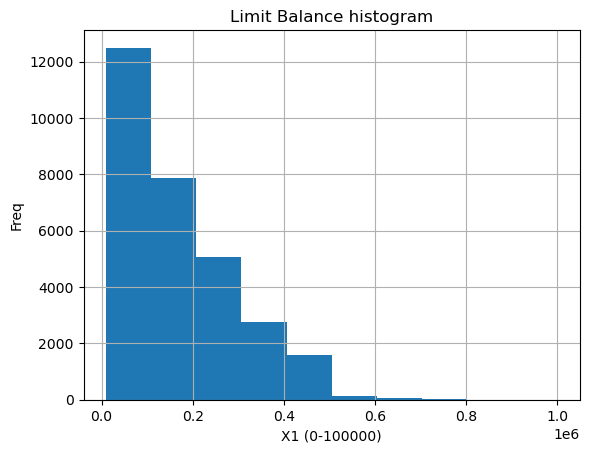

In [39]:
df['X1'].hist(bins=10)
plt.xlabel('X1 (0-100000)')
plt.ylabel('Freq')
plt.title('Limit Balance histogram')

Text(0.5, 1.0, 'Sex histogram')

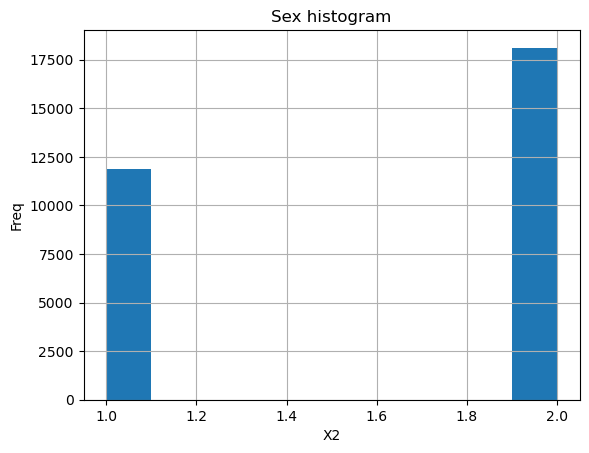

In [41]:
df['X2'].hist(bins=10)
plt.xlabel('X2')
plt.ylabel('Freq')
plt.title('Sex histogram')

Text(0.5, 1.0, 'Education histogram')

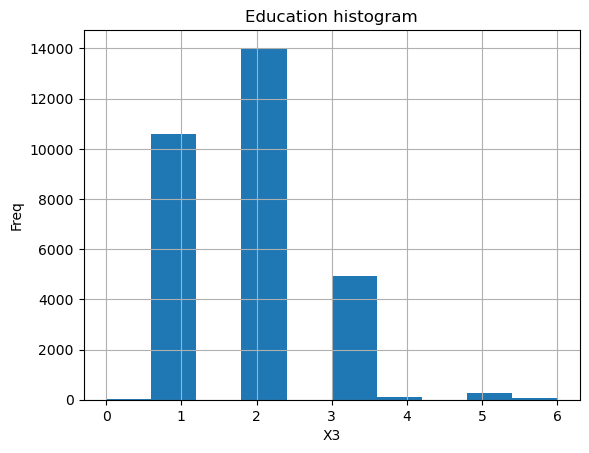

In [43]:
df['X3'].hist(bins=10)
plt.xlabel('X3')
plt.ylabel('Freq')
plt.title('Education histogram')

Text(0.5, 1.0, 'Marriage histogram')

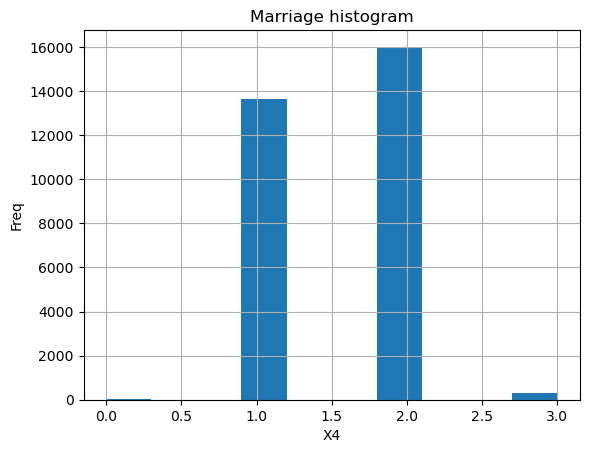

In [45]:
df['X4'].hist(bins=10)
plt.xlabel('X4')
plt.ylabel('Freq')
plt.title('Marriage histogram')


Text(0.5, 1.0, 'Age histogram')

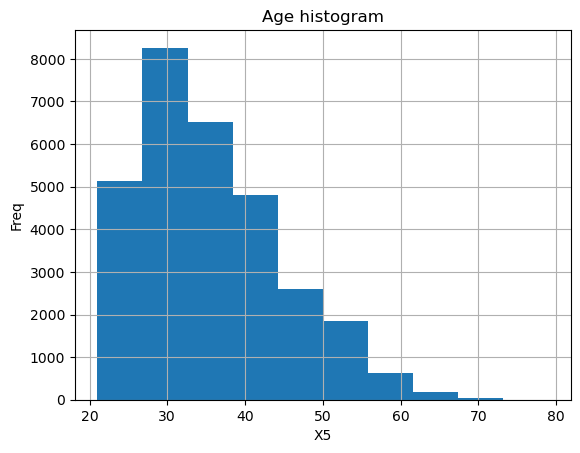

In [47]:
df['X5'].hist(bins=10)
plt.xlabel('X5')
plt.ylabel('Freq')
plt.title('Age histogram')

Text(0.5, 1.0, 'Pay 0 histogram')

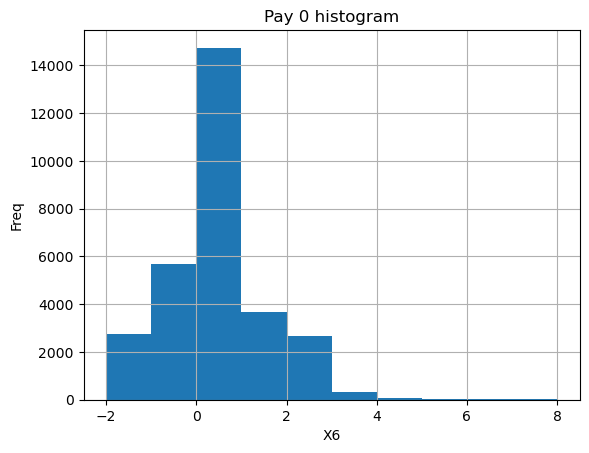

In [48]:
df['X6'].hist(bins=10)
plt.xlabel('X6')
plt.ylabel('Freq')
plt.title('Pay 0 histogram')

Text(0.5, 1.0, 'Pay_1 histogram')

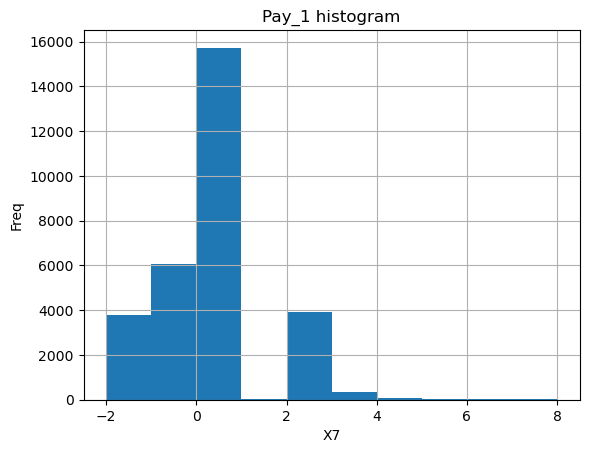

In [49]:
df['X7'].hist(bins=10)
plt.xlabel('X7')
plt.ylabel('Freq')
plt.title('Pay_1 histogram')

Text(0.5, 1.0, 'Pay_ 2 histogram')

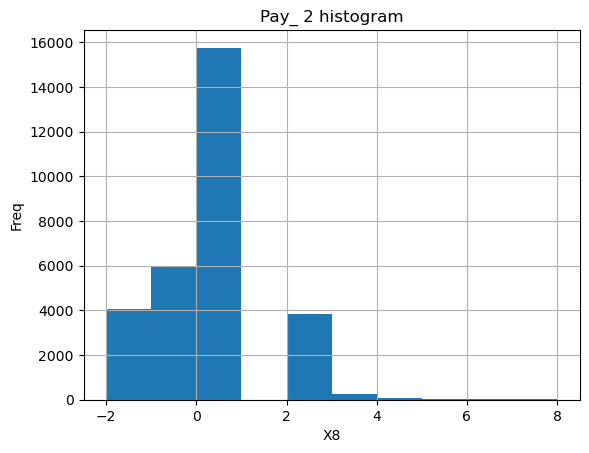

In [50]:
df['X8'].hist(bins=10)
plt.xlabel('X8')
plt.ylabel('Freq')
plt.title('Pay_ 2 histogram')

Text(0.5, 1.0, 'Pay_3 histogram')

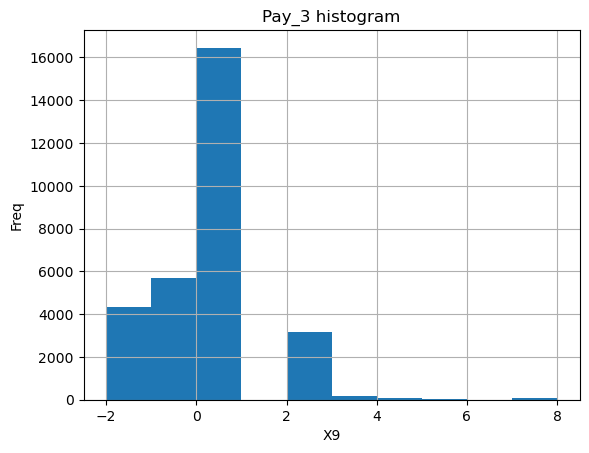

In [51]:
df['X9'].hist(bins=10)
plt.xlabel('X9')
plt.ylabel('Freq')
plt.title('Pay_3 histogram')

Text(0.5, 1.0, 'Pay_4 histogram')

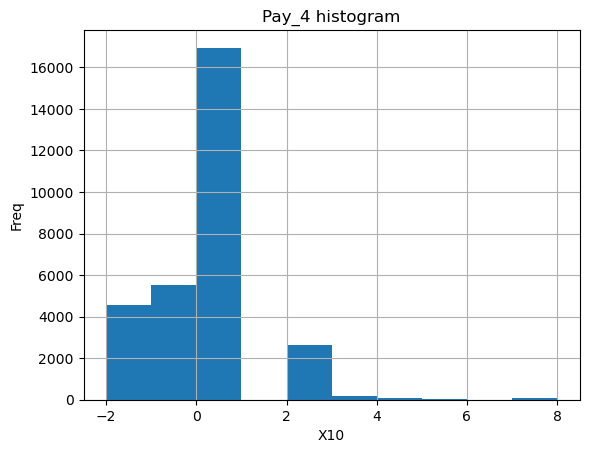

In [52]:
df['X10'].hist(bins=10)
plt.xlabel('X10')
plt.ylabel('Freq')
plt.title('Pay_4 histogram')

Text(0.5, 1.0, 'Pay_6 histogram')

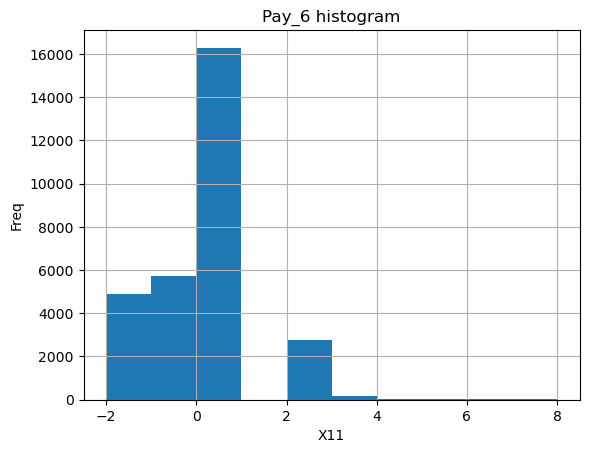

In [53]:
df['X11'].hist(bins=10)
plt.xlabel('X11')
plt.ylabel('Freq')
plt.title('Pay_6 histogram')

Text(0.5, 1.0, 'Bill Amount histogram')

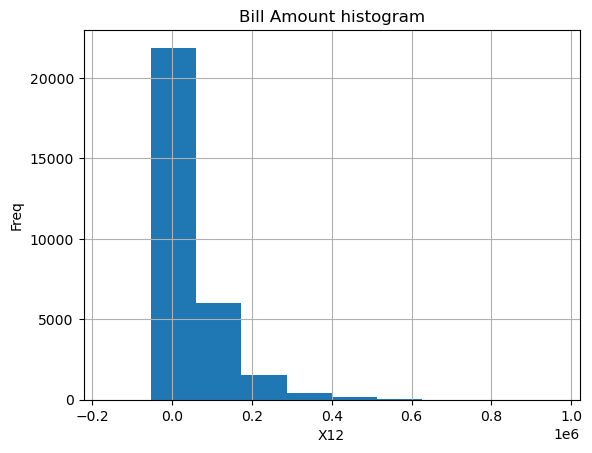

In [54]:
df['X12'].hist(bins=10)
plt.xlabel('X12')
plt.ylabel('Freq')
plt.title('Bill Amount histogram')

In [ ]:
df['X13'].hist(bins=10)
plt.xlabel('X13')
plt.ylabel('Freq')
plt.title('Education histogram')